In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import tensorflow as tf

In [23]:
x_data = np.linspace(0.0,10.0,1000000)

In [24]:
noise = np.random.randn(len(x_data))

In [25]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [26]:
noise 

array([ 0.31741518,  0.65144352,  1.4008782 , ..., -0.09826111,
        0.65114533,  0.41354902])

y = mx +b 

b = 5

In [27]:
y_true = (0.5 * x_data) + 5 + noise

In [28]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [29]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [30]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [31]:
y_df.head()

,Y
0,5.317415
1,5.651449
2,6.400888
3,4.992621
4,5.639026


In [32]:
my_data = pd.concat([x_df,y_df],axis=1)

In [33]:
my_data

,X Data,Y
0,0.00000,5.317415
1,0.00001,5.651449
2,0.00002,6.400888
3,0.00003,4.992621
4,0.00004,5.639026
...,...,...
999995,9.99996,10.162050
999996,9.99997,9.474373
999997,9.99998,9.901729
999998,9.99999,10.651140


<Axes: xlabel='X Data', ylabel='Y'>

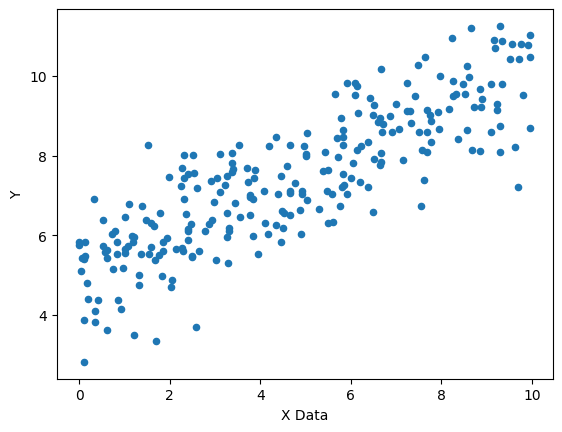

In [34]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [35]:
batch_size = 8 

In [36]:
np.random.randn(2)

array([-1.59475309, -0.39976603])

In [37]:
m = tf.Variable(0.43)
b = tf.Variable(0.02)


In [38]:
tf.compat.v1.disable_eager_execution()
xph = tf.compat.v1.placeholder(tf.float32, [batch_size])

In [39]:
yph = tf.compat.v1.placeholder(tf.float32, [batch_size])

In [40]:
y_model = m*xph + b

In [41]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [42]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [43]:
init = tf.compat.v1.global_variables_initializer()

In [45]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m,model_b = sess.run([m,b])

In [46]:
model_m

0.47737312

In [47]:
model_b

4.8714333

In [48]:
y_hat = x_data*model_m + model_b

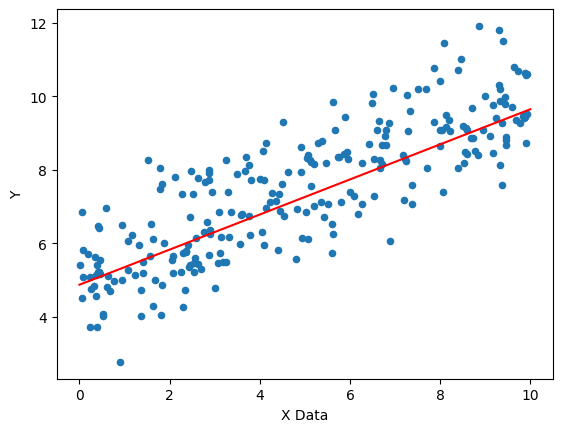

In [49]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

In general, to use the estimator API we do the following 
-   Define a list of feature columns 
-   Create the estimator model 
-   Create a Data input function 
-   Call a train, evaluate, and predict methods on the estimator object 

# TF Estimator

In [50]:
feat_cols = [ tf.feature_column.numeric_column('x',shape=[1]) ]

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [51]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\niarestr\\AppData\\Local\\Temp\\tmpui4oqxqv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker',